<a href="https://colab.research.google.com/github/jennadof/Unsupervised-Learning/blob/main/unsupervised_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm


from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm


In [84]:
df=pd.read_csv('/content/Employee_Salary_Compensation.csv')
df.head()


,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [85]:
df.shape

(678524, 22)

In [86]:
#printing attributes (columns) name
print("Column Names:", df.columns.values)

Column Names: ['Organization Group Code' 'Job Family Code' 'Job Code' 'Year Type' 'Year'
 'Organization Group' 'Department Code' 'Department' 'Union Code' 'Union'
 'Job Family' 'Job' 'Employee Identifier' 'Salaries' 'Overtime'
 'Other Salaries' 'Total Salary' 'Retirement' 'Health and Dental'
 'Other Benefits' 'Total Benefits' 'Total Compensation']


In [87]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [88]:
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 179
Union                      179
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [90]:
df.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [91]:
#delete columns or reduced number of columns

df = df.drop(columns = ['Job Code','Union Code','Job Family Code','Year Type', 'Organization Group', 'Department Code', 'Department', 'Union','Job Family', 'Job', 'Organization Group Code'])






In [92]:
df.columns

Index(['Year', 'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health and Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation'],
      dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678524 entries, 0 to 678523
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 678524 non-null  int64  
 1   Employee Identifier  678524 non-null  int64  
 2   Salaries             678524 non-null  float64
 3   Overtime             678524 non-null  float64
 4   Other Salaries       678524 non-null  float64
 5   Total Salary         678524 non-null  float64
 6   Retirement           678524 non-null  float64
 7   Health and Dental    678524 non-null  float64
 8   Other Benefits       678524 non-null  float64
 9   Total Benefits       678524 non-null  float64
 10  Total Compensation   678524 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 56.9 MB


In [94]:
col_name=df.columns
for i in col_name:
    print(i,'has :',df[i].nunique(),"Unique values")

Year has : 8 Unique values
Employee Identifier has : 322178 Unique values
Salaries has : 497610 Unique values
Overtime has : 266218 Unique values
Other Salaries has : 307561 Unique values
Total Salary has : 613748 Unique values
Retirement has : 452677 Unique values
Health and Dental has : 208405 Unique values
Other Benefits has : 495763 Unique values
Total Benefits has : 613267 Unique values
Total Compensation has : 654483 Unique values


In [95]:
df.columns

Index(['Year', 'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health and Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation'],
      dtype='object')

In [96]:
df.describe()

,Year,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,678524.000000,6.785240e+05,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000
mean,2016.541192,1.982334e+07,70626.560805,5592.672838,3869.976380,79868.345059,14075.094654,10118.295876,5097.533951,29290.924481,109159.269539
std,2.268684,1.970531e+07,48190.977875,13324.789874,8631.413917,56230.800682,10392.881265,5850.553543,3748.283728,18202.223207,73062.782901
min,2013.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2015.000000,2.875200e+04,30502.342500,0.000000,0.000000,33435.487500,5059.605000,4934.745000,1937.507500,12486.985000,46834.075000
50%,2017.000000,3.665566e+07,68942.825000,0.000000,720.000000,76099.415000,14248.725000,12512.550000,4965.885000,33102.795000,109394.735000
75%,2019.000000,3.767592e+07,101887.527500,4429.512500,4399.657500,114259.067500,20619.282500,14391.605000,7620.710000,41566.422500,156607.520000
max,2020.000000,4.609664e+07,651936.710000,321523.310000,568163.120000,658867.570000,128694.620000,59405.230000,35691.040000,166068.180000,807625.250000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678524 entries, 0 to 678523
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 678524 non-null  int64  
 1   Employee Identifier  678524 non-null  int64  
 2   Salaries             678524 non-null  float64
 3   Overtime             678524 non-null  float64
 4   Other Salaries       678524 non-null  float64
 5   Total Salary         678524 non-null  float64
 6   Retirement           678524 non-null  float64
 7   Health and Dental    678524 non-null  float64
 8   Other Benefits       678524 non-null  float64
 9   Total Benefits       678524 non-null  float64
 10  Total Compensation   678524 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 56.9 MB


In [98]:
miss_val = df.isna().sum()
miss_val

Year                   0
Employee Identifier    0
Salaries               0
Overtime               0
Other Salaries         0
Total Salary           0
Retirement             0
Health and Dental      0
Other Benefits         0
Total Benefits         0
Total Compensation     0
dtype: int64

In [99]:
df.Salaries.unique()

array([ 57534.65,  57678.5 ,  63532.93, ...,   9416.71,  96475.  ,
       115943.  ])

In [100]:
x=df[(df['Salaries']!='?')]
x=x.Salaries.median()
x

68942.825

In [101]:
#df.Salaries.replace(to_replace='?',value=93.5,inplace=True)

In [102]:
df.Salaries.unique()

array([ 57534.65,  57678.5 ,  63532.93, ...,   9416.71,  96475.  ,
       115943.  ])

In [103]:
df.describe()

,Year,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,678524.000000,6.785240e+05,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000
mean,2016.541192,1.982334e+07,70626.560805,5592.672838,3869.976380,79868.345059,14075.094654,10118.295876,5097.533951,29290.924481,109159.269539
std,2.268684,1.970531e+07,48190.977875,13324.789874,8631.413917,56230.800682,10392.881265,5850.553543,3748.283728,18202.223207,73062.782901
min,2013.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2015.000000,2.875200e+04,30502.342500,0.000000,0.000000,33435.487500,5059.605000,4934.745000,1937.507500,12486.985000,46834.075000
50%,2017.000000,3.665566e+07,68942.825000,0.000000,720.000000,76099.415000,14248.725000,12512.550000,4965.885000,33102.795000,109394.735000
75%,2019.000000,3.767592e+07,101887.527500,4429.512500,4399.657500,114259.067500,20619.282500,14391.605000,7620.710000,41566.422500,156607.520000
max,2020.000000,4.609664e+07,651936.710000,321523.310000,568163.120000,658867.570000,128694.620000,59405.230000,35691.040000,166068.180000,807625.250000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


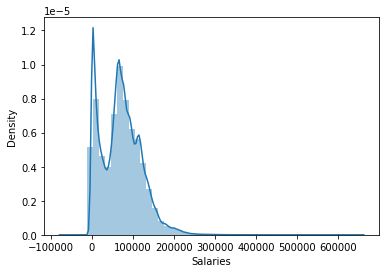

In [104]:
sns.distplot(df['Salaries'])
plt.show()


In [105]:
print("Skewness: %f" % df['Salaries'].skew())
print("Kurtosis: %f" % df['Salaries'].kurt())

Skewness: 0.575085
Kurtosis: 0.771214


In [106]:
from sklearn.cluster import KMeans



In [107]:
kmeans=KMeans(n_clusters=3)

In [108]:
df.columns

Index(['Year', 'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health and Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation'],
      dtype='object')

In [109]:
kmeans.fit(df)

KMeans(n_clusters=3)

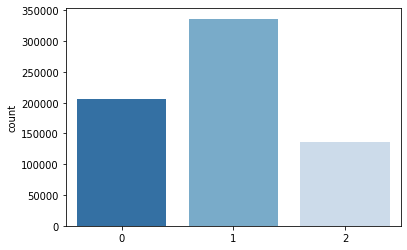

In [110]:
sns.countplot(x=kmeans.labels_ , palette = 'Blues_r')
plt.show()

In [111]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [112]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X= df
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


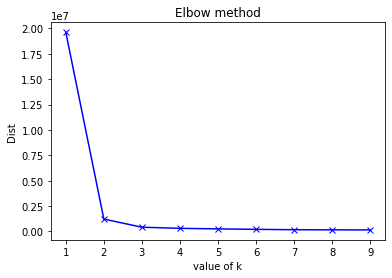

In [115]:
plt.plot(K,distortions,"bx-")
plt.xlabel('value of k')
plt.ylabel('Dist')
plt.title('Elbow method')
plt.show()

In [116]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

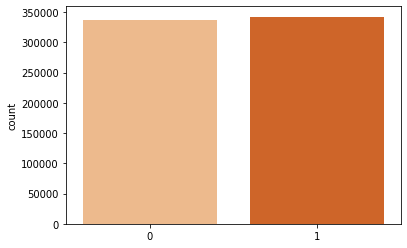

In [123]:
sns.countplot(x=kmeans.labels_,palette='Oranges')
plt.show()

In [121]:
y = kmeans.labels_

In [122]:
from sklearn.metrics import silhouette_score
silhouette_score(X,y)

0.9627173717912595

In [ ]:
# The K-Mean model is easy to fit the dataset because the dataset was large